In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

In [63]:
# load the dataframes, concat them, and reset the index

true = pd.read_csv('../data/True.csv')
true['label'] = 'True'
fake = pd.read_csv('../data/Fake.csv')
fake['label'] = 'Fake'

dataset = pd.concat([true, fake], ignore_index=True)
dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


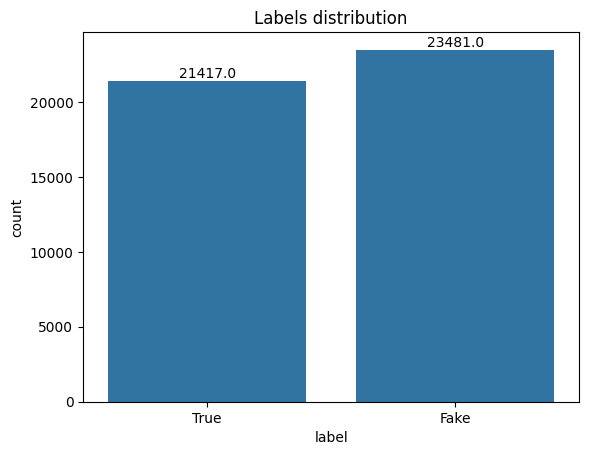

In [64]:
# see the distribution of the clases

plt.title('Labels distribution')
ax =sns.countplot(x='label', data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

plt.show()

count    44898.000000
mean      2469.109693
std       2171.617091
min          1.000000
25%       1234.000000
50%       2186.000000
75%       3105.000000
max      51794.000000
Name: text_len, dtype: float64

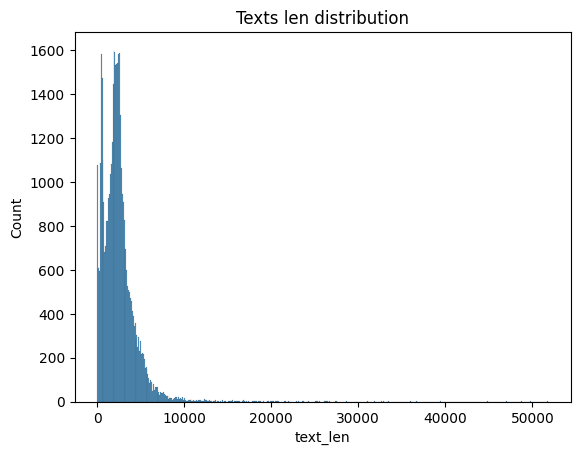

In [65]:
# see text len and its distribution

dataset['text_len'] = dataset['text'].apply(len)
display(dataset['text_len'].describe())

plt.title('Texts len distribution')
sns.histplot(dataset['text_len'])
plt.show()


In [66]:
# prepare the dataset to use RoBERTa and DeBERTa

def preprocess(text):
    '''
    Args:
        text (str): Input text to clean 
    '''
    # remove non-ASCII characters
    text = text.encode('ascii', errors='ignore').decode('ascii')
    # remove HTML tags if present
    text = re.sub(r'<.*?>', '', text)
    # replacing tabs, newlines... with a single space
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    return text

dataset['text'] = dataset['text'].apply(preprocess)

In [67]:
# split the dataset in train, validation and test

X = dataset.drop(['label', 'date', 'text_len'], axis=1)
y = dataset['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp)


In [68]:
# save the files

X_train.to_csv('../data/X_train.csv')
X_test.to_csv('../data/X_test.csv')
X_validation.to_csv('../data/X_validation.csv')
y_train.to_csv('../data/y_train.csv')
y_test.to_csv('../data/y_test.csv')
y_validation.to_csv('../data/y_validation.csv')